# Visualización de datos

Cinthia Sánchez

## Objetivos:
* Familiarizarse con las librerías matplotlib, seaborn y plotly, así como con distintas técnicas de visualización de datos.
* Crear visualizaciones en Python.

# Introducción

1. Haz una copia de este notebook en `File -> Save a copy in Drive`. Esto guardará el notebook bajo tu cuenta.

2. Para ejecutar una celda, haz click en el ícono ▶️   al lado izquierdo de cada celda (donde aparecen los corchetes `[ ]`), o presiona Shift+Enter al posicionar el cursor en la celda.

3. Puedes editar las celdas como quieras, pero cuidado con mantener el orden de la ejecución de tus celdas!

## Instalación y carga de bibliotecas

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Si muestra este mensaje es porque la carga de las librerías anteriores está ok!")

Si muestra este mensaje es porque la carga de las librerías anteriores está ok!


# Visualización básica
Partiremos visualizando una curva a partir de un conjunto de puntos en el eje x y en el eye y.

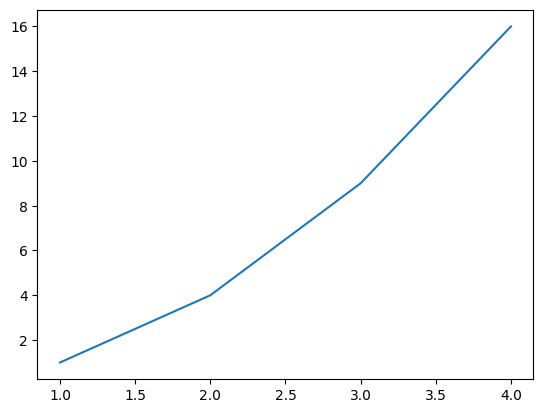

In [ ]:
x_values = [1, 2, 3, 4]
y_values = [1, 4, 9, 16]

plt.plot(x_values, y_values) #ver documentación "plt.plot?"
plt.show()

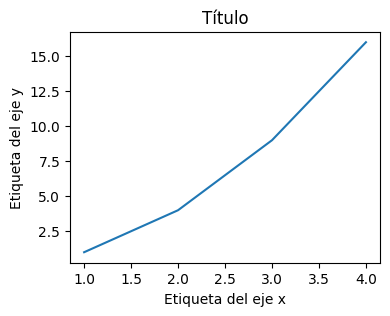

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(x_values, y_values)
plt.ylabel('Etiqueta del eje y')
plt.xlabel('Etiqueta del eje x')
plt.title("Título")
plt.show()

Definiendo colores: Pueden ver la lista de colores en la [documentación](https://matplotlib.org/stable/gallery/color/named_colors.html) y agregarla como un parámetro más en función de visualización

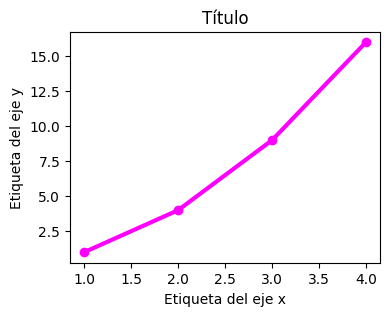

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(x_values, y_values, color="fuchsia", linewidth=3, marker='o')
plt.ylabel('Etiqueta del eje y')
plt.xlabel('Etiqueta del eje x')
plt.title("Título")
plt.show()

# Visualizaciones para estadística descriptiva

A continuación veremos algunas técnicas de visualización, agrupadas según el propósito. Por ejemplo, mostrar cantidades, distribuciones, relaciones entre atributos, etc. Antes, cargaremos los datos que usaremos a lo largo de esta sesión y haremos un breve análisis exploratorio.

**Datos:**
Usaremos el dataset **diamonds** que contiene los precios y otros atributos de casi 54.000 diamantes. Ver detalle de los atributos del dataset en la documentación.Fuente: https://ggplot2.tidyverse.org/reference/diamonds.html

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
data.shape

(53940, 10)

In [ ]:
data.head()
#data.info() #ver resumen del DataFrame
#data.describe() #ver estadísticas de variables numéricas

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Visualizar cantidades

Podemos ver cómo varía una cantidad cuantitativa con respecto a una o más variables categóricas.

### Gráficos de barras

Un gráfico de barras muestra la relación entre una variable numérica y una categórica.
Cada entidad de la variable categórica se representa como una barra.
El tamaño de la barra representa su valor numérico.
Es por eso que las barras deben empezar en cero, de modo que la longitud de la barra sea proporcional a la cantidad mostrada.

Consideraciones:

*  Si las barras representan categorias ordinales, respetar el orden.
* Si las barras representan categorias nominales, ordenarlas (ascendente/descendentemente).

**Estos gráficos se pueden crear con la función `bar()` de Matplotlib , previamente estimando la agrupación que deseamos. También se puede con `barplot()` de Seaborn que automáticamente muestra el valor medio (u otro estimador).**

Documentación y ejemplos: https://seaborn.pydata.org/generated/seaborn.barplot.html

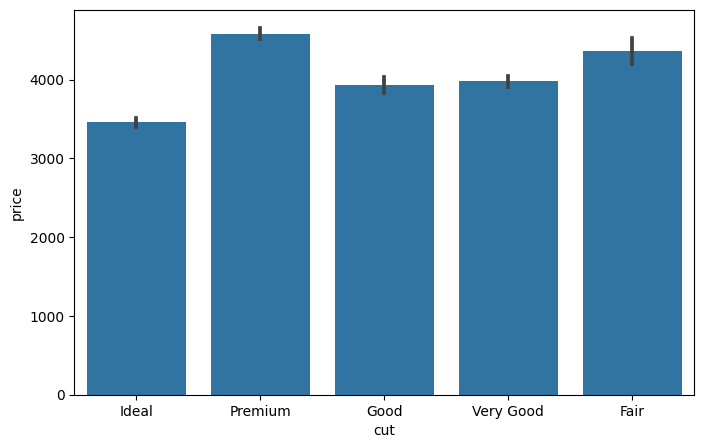

In [ ]:
#Respecto a una variable categórica
plt.figure(figsize=(8, 5))

sns.barplot(x="cut",
            y="price",
            color='tab:blue',
            data=data)
plt.show()
#errorbar=None, color='#69b3a2', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
#plt.xticks(rotation=45)

**Nota:** Para mostrar conteos, Seaborn tiene la función `countplot`. Esta muestra los recuentos de las observaciones en cada categoría utilizando barras. Es como un histograma a través de una variable categórica, en lugar de cuantitativa. Por ejemplo: `sns.countplot()`

In [ ]:
# Ejercicio: Visualice la cantidad de diamantes (registros) según el corte ('cut')
#¿Cuál corte tiene más diamantes y cuál tiene menos?



Nombres de Colormaps en Matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

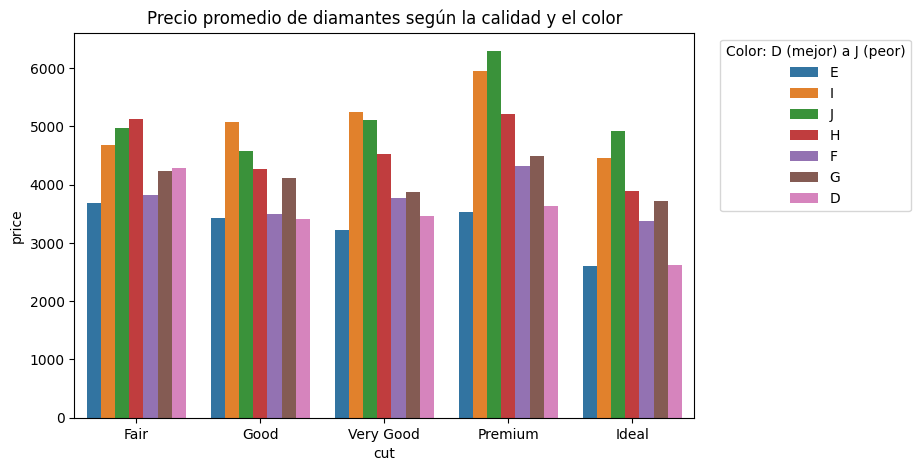

In [ ]:
#Respecto a dos variables categóricas

plt.figure(figsize=(8, 5))

sns.barplot(x="cut",
            y="price",
            hue="color",
            errorbar=None,
            order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
            data=data);

plt.title('Precio promedio de diamantes según la calidad y el color')
plt.legend(bbox_to_anchor=(1.03, 1), title='Color: D (mejor) a J (peor)')
plt.show()

#hue_order= ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
#palette='YlGnBu'


**Nota:** Muchas veces es recomendable dividir el problema en secuencias de pequeños problemas. Es decir, visualizar los datos para cada categoría en gráficos separados pero usando los mismos ejes (manteniendo la propiedad de ser comparables). Esto lo podemos hacer con: `sns.catplot()`

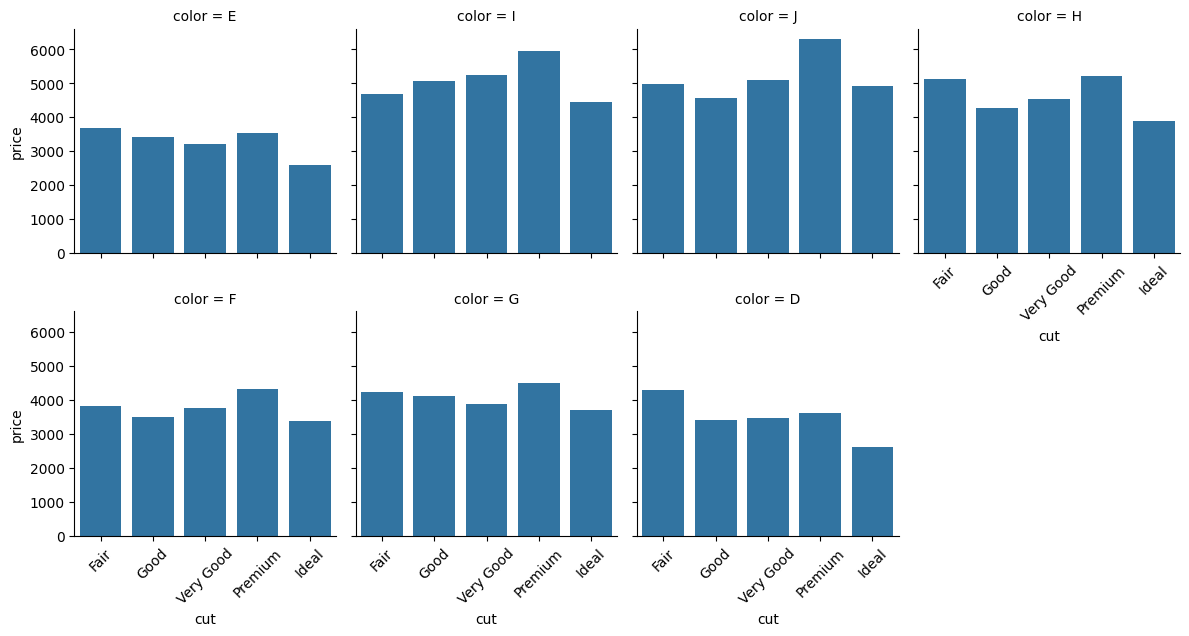

In [ ]:
g = sns.catplot(x="cut",
            y="price",
            col="color",
            col_wrap=4,
            data=data,
            kind="bar",
            errorbar=None,
            color='tab:blue',
            order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
            height=3)

#g.tick_params(axis='x', rotation=45)
plt.show()

### Mapas de calor (heatmaps)

Para conjuntos de datos muy grandes, podemos mapear los valores de los datos en colores. El mapa de calor destaca las tendencias más amplias.

Documentación y ejemplos: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
#Necesitamos formatear los datos (tal cual los vamos a mostrar en el mapa de calor)
table = data.groupby(['cut', 'color']).mean(numeric_only=True)[['price']].reset_index()
table = table.pivot(index="cut", columns="color", values="price")
table

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


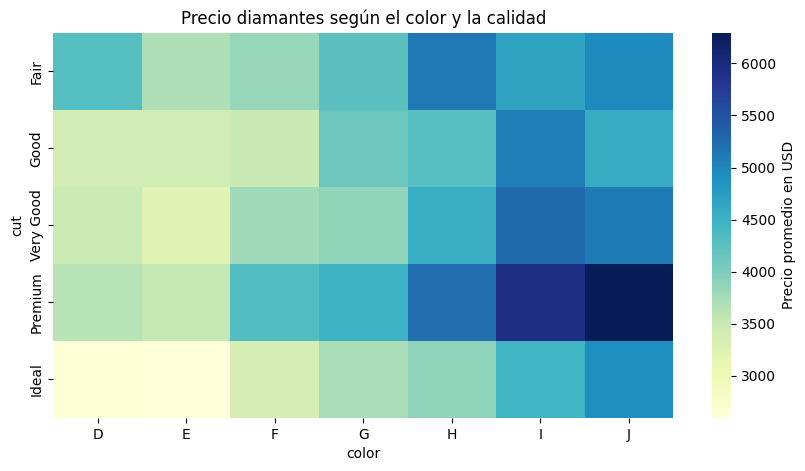

In [ ]:
table = table.loc[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']] #ordenamos los datos según la categoría

plt.figure(figsize=(10, 5))
sns.heatmap(table,
            cmap="YlGnBu",
            cbar_kws={'label': 'Precio promedio en USD'})

plt.title('Precio diamantes según el color y la calidad')
plt.show()

In [ ]:
# Ejercicio: Visualice el precio promedio de diamantes segun 'clarity' y 'color'
#¿Qué puede decir de la visualización obtenida?



## Visualizar distribuciones

### Histogramas

Un histograma representa la distribución de una o más variables mediante el recuento del número de observaciones que caen dentro de intervalos distintos (bins).

* Es fundamental probar diferentes anchos de intervalo para verificar que el histograma refleja con precisión los datos. Esto puede influir sustancialmente en los conocimientos que se pueden extraer de la visualización. Si los intervalos son demasiado grandes, pueden borrar características importantes. Por otro lado, los intervalos demasiado pequeños pueden estar dominados por la variabilidad aleatoria, ocultando la forma de la verdadera distribución subyacente. Pueden cambiar el parámetro `binwidth` o `bin`.

Documentación y ejemplos: https://seaborn.pydata.org/generated/seaborn.histplot.html

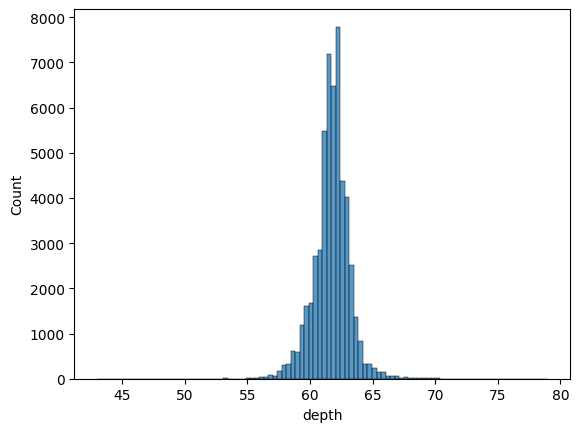

In [ ]:
#Histograma de una variable
sns.histplot(data=data, x="depth", bins=100);

# kde=True

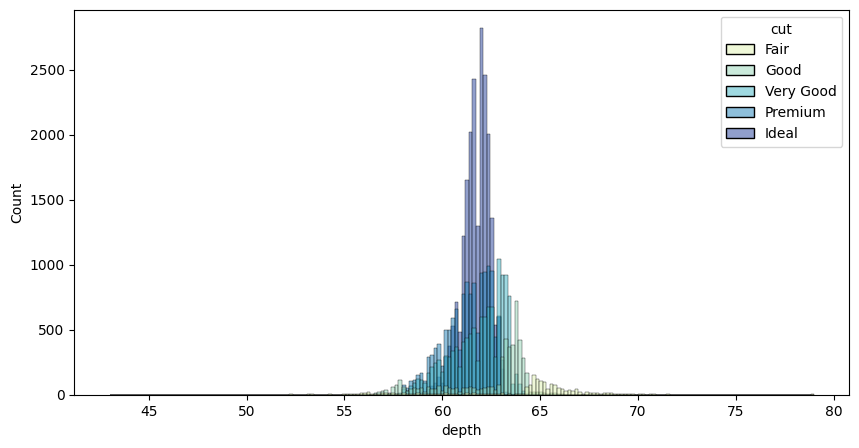

In [ ]:
# Histograma de dos variables (apiladas o separadas)
plt.figure(figsize=(10, 5))

sns.histplot(data=data,
             x="depth",
             hue='cut',
             hue_order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
             palette='YlGnBu',
             bins=200);

#alpha=0.5

**Nota**: Para este mismo fin, también podemos crear gráficos de densidad con `sns.displot()`.

Más información sobre esta técnica y otras para visualizar distribuciones: https://seaborn.pydata.org/tutorial/distributions.html

### Gráficos de cajas (boxplots)

Un diagrama de caja (o diagrama de caja y bigotes) muestra la distribución de los datos cuantitativos de forma que facilita las comparaciones entre variables o entre niveles de una variable categórica. La caja muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución. Permite obtener rápidamente la mediana, los cuartiles y los valores atípicos.

![alt text](https://clauswilke.com/dataviz/boxplots_violins_files/figure-html/boxplot-schematic-1.png)
Source: https://clauswilke.com/dataviz/boxplots-violins.html


Documentación y ejemplos: https://seaborn.pydata.org/generated/seaborn.boxplot.html


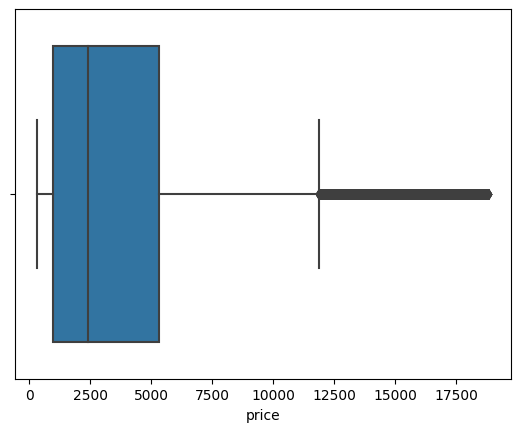

In [ ]:
#Boxplot horizontal:
sns.boxplot(x=data['price']);

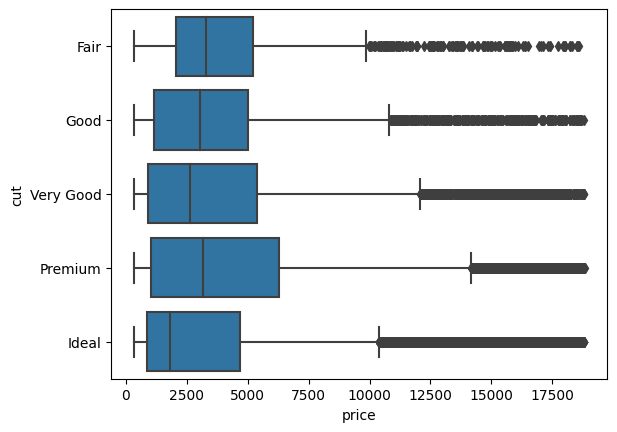

In [ ]:
#Boxplot agrupado por una variable categórica:
sns.boxplot(x='price',
            y='cut',
            data=data,
            color='tab:blue',
            order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
            );

#showfliers=False

## Visualizar relaciones

### Gráficos de dispersión (o scatter plots)

Permiten visualizar las asociaciones entre dos o más variables cuantitativas. Permite codificar variables cuantitativas con `size`, y cualitativas con `hue` y `style`.

Documentación y ejemplos: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

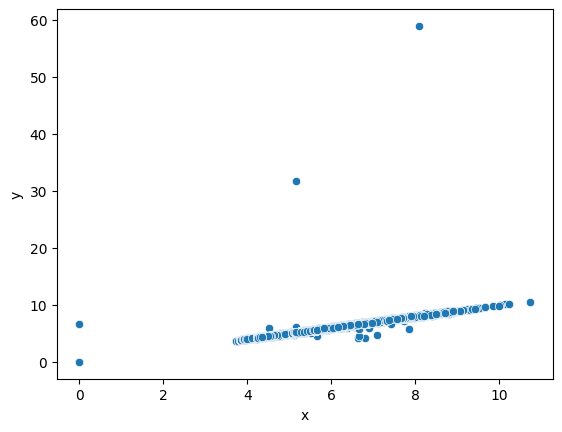

In [ ]:
sns.scatterplot(data=data, x="x", y="y");

#plt.ylim([0, 12]);

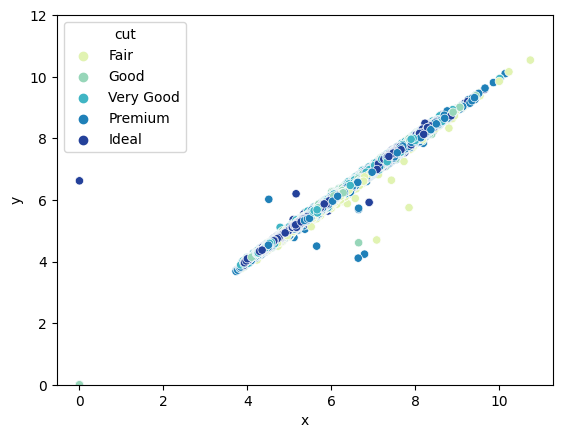

In [ ]:
sns.scatterplot(data=data,
                x="x",
                y="y",
                hue='cut',
                palette='YlGnBu',
                hue_order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

#plt.legend(bbox_to_anchor=(1.3, 1), title='Cut') #Configuramos la posición de la leyenda
plt.ylim([0, 12]);

In [ ]:
# Ejercicio: Visualice la distribución del precio vs quilate
#¿Existe una fuerte correlación?



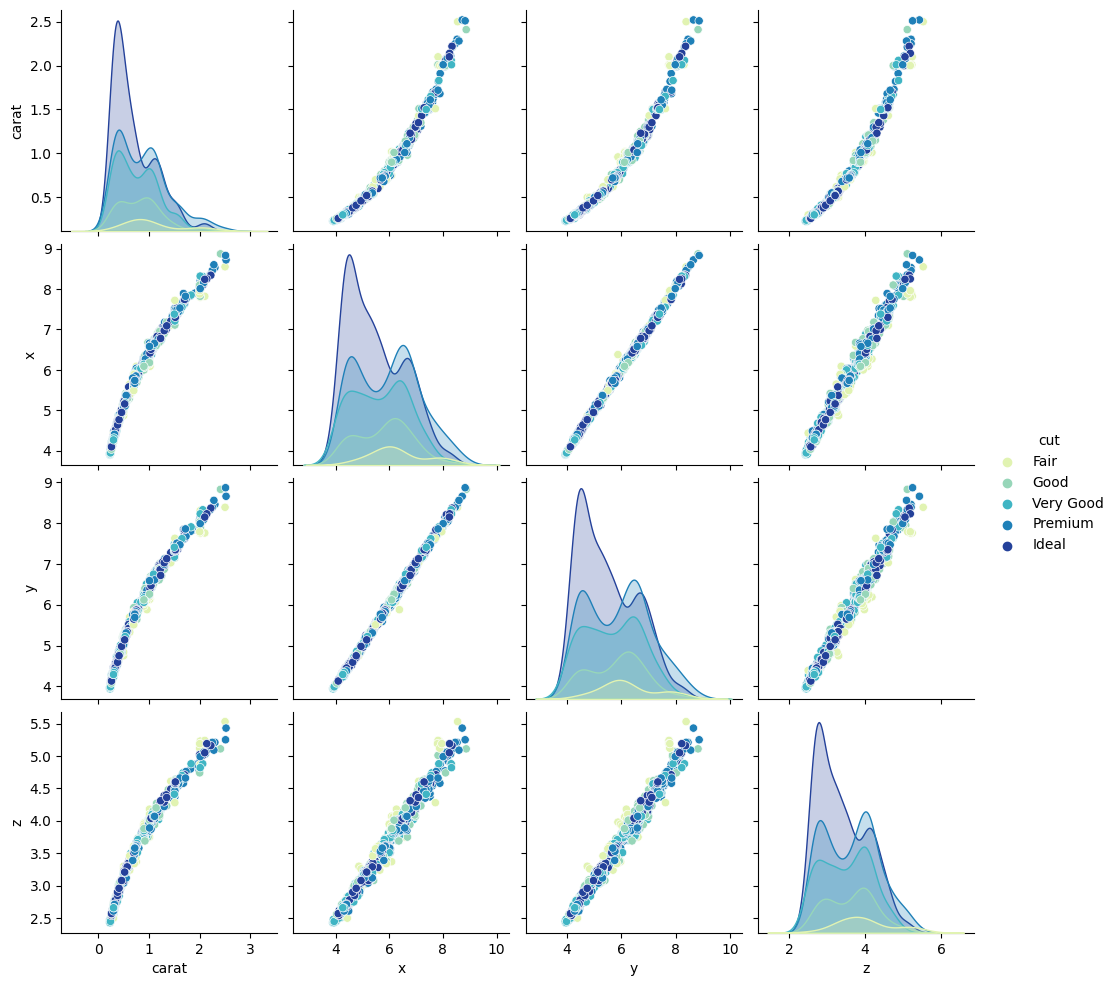

In [ ]:
#También podemos visualizar relaciones entre pares de variables simultáneamente

sample_data = data.sample(1000, random_state=0) #usaremos solo una muestra de los datos
sample_data = sample_data[['carat', 'x', 'y', 'z', 'cut']]

sns.pairplot(sample_data,
             hue='cut',
             palette='YlGnBu',
             hue_order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']);

# Visualización (interactiva) de datos anidados o jerárquicos

**Datos anidados o jerárquicos:**
Datos donde existen agrupaciones naturales. Ejemplo organizaciones dentro de una empresa, regiones dentro de un país, marcas de un producto, o disciplinas dentro de una materia. Requieren cierto nivel de orden y estructura organizativa.

Este tipo de datos tiene un nodo de origen que da lugar a los nodos posteriores y así sucesivamente hasta las hojas finales.

Técnicas de visualización:

* Treemap
* Sankey

Nombres de Colormaps en Plotly: [secuenciales](https://plotly.com/python/builtin-colorscales/#builtin-sequential-color-scales), [discretas](https://plotly.com/python/builtin-colorscales/#discrete-color-sequences).


## Treemap

Un Treemap muestra datos jerárquicos como un conjunto de rectángulos anidados, cuya área es proporcional a su valor (función `suma`).

Usaremos como ejemplo datos de la población mundial por país en el año 2007, disponible en Gapminder mediante la librería Ploty. En esta estructura de árbol, los países se consideran hojas: están al final de las ramas.

Documentación: https://plotly.com/python/treemaps/

In [ ]:
import numpy as np

#Cada fila del dataset representa un país en un año determinado.
data = px.data.gapminder()
data = data[data.year==2007]
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [ ]:
data.shape

(142, 8)

In [ ]:
fig = px.treemap(data,
                 path=[px.Constant("Población mundial"), 'continent'],
                 values='pop')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
#agregamos otro nivel (país)
fig = px.treemap(data,
                 path=[px.Constant("world"), 'continent', 'country'],
                 values='pop')
fig.show()

In [ ]:
#agregamos variable visual color (expectativa de vida) y nueva etiqueta de atributo con parámetro `hover_data`

fig = px.treemap(data, path=[px.Constant("world"), 'continent', 'country'],
                 values='pop',
                 color='lifeExp',
                 hover_data=['iso_alpha', 'year'],
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(data['lifeExp'], weights=data['pop'])
                 )
fig.show()

## Sankey

Técnica de visualización que permite mostrar flujos. Varias entidades (nodos) se representan mediante rectángulos o texto. Sus vínculos se representan con flechas o arcos que tienen una anchura proporcional a la importancia del flujo.

Documentación: https://plotly.com/python/sankey-diagram/

In [ ]:
import plotly.graph_objects as go

link = dict(source = [0, 0, 1, 1, 0, 2], # los índices corresponden a las etiquetas, por ejemplo A1, A1, A2, A2, A1, B1
            target = [2, 3, 4, 5, 4, 5],
            value  = [8, 2, 2, 8, 4, 2])

node = dict(label = ["A1", "A2", "B1", "C1", "C2", "C3"],
            color = "green")

data = go.Sankey(link=link, node=node)
fig = go.Figure(data)

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()


In [ ]:
#El siguiente código carga el dataset de matrículas preprocesado
# utilizado en https://jthoth.github.io/dataviz/

import pandas as pd
import base64
import requests
import json

master = "https://raw.githubusercontent.com/jthoth/dataviz/master/Postgrado.json"
req = requests.get(master)
req = json.loads(req.text)
matricula = pd.DataFrame(req['data'], columns=req['columns'])
matricula.head()

,node_from,node_to,value,from,to,year_from,year_to,differents
0,U Catolica De Chile 2007,U Catolica De Chile 2008,1582,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,2007,2008,False
1,U Catolica De Chile 2007,U Adolfo Ibañez 2008,1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD ADOLFO IBAÑEZ,2007,2008,True
2,U Catolica De Chile 2007,U Andres Bello 2008,1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD ANDRES BELLO,2007,2008,True
3,U Catolica De Chile 2007,U De Chile 2008,7,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD DE CHILE,2007,2008,True
4,U Catolica De Chile 2007,U De Santiago De Chile 2008,1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,UNIVERSIDAD DE SANTIAGO DE CHILE,2007,2008,True


In [ ]:
#Filtramos la información de interés
matricula_2007_2008 = matricula[(matricula.year_from.isin([2007, 2008])) & (matricula.differents)]
matricula_2007_2008.shape

(90, 8)

In [ ]:
# Sankey recibe números (ejemplo, identificadores) no string (ejemplo, nombres de las universidades)
# Pasamos los nombres (únicos) de las universidades (from y to) a índices (identificadores)
nodes = np.unique(matricula_2007_2008[["node_from", "node_to"]], axis=None)
nodes = pd.Series(index=nodes, data=range(len(nodes)))
nodes

U  Catolica De Chile 2007                    0
U  Catolica De Chile 2008                    1
U  Catolica De Chile 2009                    2
U  Humanismo Cristiano 2007                  3
U  Humanismo Cristiano 2008                  4
U  Humanismo Cristiano 2009                  5
U Adolfo Ibañez 2007                         6
U Adolfo Ibañez 2008                         7
U Adolfo Ibañez 2009                         8
U Alberto Hurtado 2007                       9
U Alberto Hurtado 2008                      10
U Alberto Hurtado 2009                      11
U Andres Bello 2008                         12
U Andres Bello 2009                         13
U Bolivariana 2008                          14
U Bolivariana 2009                          15
U Catolica Silva Henriquez 2007             16
U Central De Chile 2007                     17
U Central De Chile 2009                     18
U De Arte Y Ciencias Sociales Arcis 2008    19
U De Arte Y Ciencias Sociales Arcis 2009    20
U De Chile 20

In [ ]:
import plotly.graph_objects as go

#Accedemos al 'identificador de la universidad' por medio de los índices con `loc[]`
link = dict(source = nodes.loc[matricula_2007_2008["node_from"]],
            target = nodes.loc[matricula_2007_2008["node_to"]],
            value  = matricula_2007_2008['value'])

node = dict(label = nodes.index)

data = go.Sankey(link=link, node=node)
fig = go.Figure(data)

fig.update_layout(title_text="FLUJO ESTUDIANTIL UNIVERSITARIO DE POSTGRADO EN SANTIAGO, 2007-2008", font_size=10)
fig.show()

# Reportes con Dash


![alt text](https://raw.githubusercontent.com/cinthiasanchez/Data-Mining/main/Dash.png)

Tutorial: https://dash.plotly.com/

# Referencias:

* https://matplotlib.org/stable/gallery/index.html
* https://seaborn.pydata.org/examples/index.html
* https://plotly.com/graphing-libraries/

Otros sitios recomendados:
* https://www.data-to-viz.com/
* https://datavizcatalogue.com/
* https://datavizproject.com/
